# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from datetime import datetime as dt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
weather_data = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
weather_data.head()
# Create a settings object with your API key and preferred units
settings = {"units": "metric", "appid": api_key}
summary = ["main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed", "clouds.all", "sys.country", "dt"]
# Get current weather
count = 0
print(f"Beginning Data Retrieval    ")
print(f"------------------------------")
for city in cities:
    count = count + 1    
    try:
        current_weather = owm.get_current(city, **settings)
        print(f"Processing Record {count} of Set {len(cities)} | {city}") 
        #print(current_weather)
        data = current_weather(*summary)
        weather_data = weather_data.append({"City": city, "Date": data[7], "Lat": data[1], "Lng": data[2], "Max Temp": data[3], "Humidity": data[0], "Wind Speed": data[4], "Cloudiness": data[5], "Country": data[6]}, ignore_index=True)
    except: 
        print(f"City not found. Skipping...")


Beginning Data Retrieval    
------------------------------
Processing Record 1 of Set 634 | tuktoyaktuk
Processing Record 2 of Set 634 | puerto ayora
Processing Record 3 of Set 634 | qaqortoq
Processing Record 4 of Set 634 | rikitea
Processing Record 5 of Set 634 | arraial do cabo
Processing Record 6 of Set 634 | black river
Processing Record 7 of Set 634 | hervey bay
City not found. Skipping...
Processing Record 9 of Set 634 | busselton
Processing Record 10 of Set 634 | vestmannaeyjar
Processing Record 11 of Set 634 | xinmin
Processing Record 12 of Set 634 | chinhoyi
Processing Record 13 of Set 634 | albany
Processing Record 14 of Set 634 | kashirskoye
Processing Record 15 of Set 634 | krasnyy yar
City not found. Skipping...
Processing Record 17 of Set 634 | xining
Processing Record 18 of Set 634 | labuan
Processing Record 19 of Set 634 | tiarei
Processing Record 20 of Set 634 | surt
Processing Record 21 of Set 634 | hithadhoo
Processing Record 22 of Set 634 | airai
Processing Record

Processing Record 195 of Set 634 | ambon
Processing Record 196 of Set 634 | bubaque
Processing Record 197 of Set 634 | port-gentil
Processing Record 198 of Set 634 | prieska
Processing Record 199 of Set 634 | maine-soroa
Processing Record 200 of Set 634 | khatanga
City not found. Skipping...
Processing Record 202 of Set 634 | atbasar
Processing Record 203 of Set 634 | aranos
Processing Record 204 of Set 634 | yeppoon
Processing Record 205 of Set 634 | saint-philippe
Processing Record 206 of Set 634 | clyde river
Processing Record 207 of Set 634 | dingle
Processing Record 208 of Set 634 | meulaboh
Processing Record 209 of Set 634 | sept-iles
Processing Record 210 of Set 634 | provideniya
Processing Record 211 of Set 634 | bosaso
Processing Record 212 of Set 634 | victoria
Processing Record 213 of Set 634 | marzuq
Processing Record 214 of Set 634 | tulum
Processing Record 215 of Set 634 | bhatkal
Processing Record 216 of Set 634 | carnarvon
Processing Record 217 of Set 634 | ilukste
Proc

Processing Record 387 of Set 634 | katete
Processing Record 388 of Set 634 | kaitangata
Processing Record 389 of Set 634 | dakar
Processing Record 390 of Set 634 | fort saint james
Processing Record 391 of Set 634 | tatarskaya pishlya
Processing Record 392 of Set 634 | banjarmasin
Processing Record 393 of Set 634 | umm lajj
City not found. Skipping...
Processing Record 395 of Set 634 | tuatapere
Processing Record 396 of Set 634 | baykit
Processing Record 397 of Set 634 | petatlan
Processing Record 398 of Set 634 | eureka
Processing Record 399 of Set 634 | pandamatenga
Processing Record 400 of Set 634 | sibu
Processing Record 401 of Set 634 | aklavik
Processing Record 402 of Set 634 | livanatai
Processing Record 403 of Set 634 | middelburg
Processing Record 404 of Set 634 | narsaq
City not found. Skipping...
Processing Record 406 of Set 634 | deneysville
Processing Record 407 of Set 634 | namibe
Processing Record 408 of Set 634 | inyonga
Processing Record 409 of Set 634 | kieta
Processi

Processing Record 580 of Set 634 | great bend
Processing Record 581 of Set 634 | port keats
Processing Record 582 of Set 634 | sinfra
Processing Record 583 of Set 634 | linqing
City not found. Skipping...
City not found. Skipping...
Processing Record 586 of Set 634 | chimbote
Processing Record 587 of Set 634 | chambas
Processing Record 588 of Set 634 | katrineholm
Processing Record 589 of Set 634 | sur
Processing Record 590 of Set 634 | urubicha
Processing Record 591 of Set 634 | banepa
Processing Record 592 of Set 634 | iberia
Processing Record 593 of Set 634 | hami
City not found. Skipping...
Processing Record 595 of Set 634 | husavik
Processing Record 596 of Set 634 | leh
Processing Record 597 of Set 634 | atasu
Processing Record 598 of Set 634 | mahon
Processing Record 599 of Set 634 | soure
Processing Record 600 of Set 634 | elbrus
Processing Record 601 of Set 634 | surgut
Processing Record 602 of Set 634 | qarqin
Processing Record 603 of Set 634 | eyl
City not found. Skipping...


'\n# keys will be used as column names\n>>> selection = data.select_pandas(["dt", "main.temp", "wind.speed"])\n'

In [41]:
"""
with open('names.csv', 'w', newline='') as csvfile:
    fieldnames = ['first_name', 'last_name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'first_name': 'Baked', 'last_name': 'Beans'})
    writer.writerow({'first_name': 'Lovely', 'last_name': 'Spam'})
    writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})
"""
#df = pd.merge(weather_df, weather_data, how="left", left_on="City", right_on="City")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuktoyaktuk,0,CA,1537434054,100,69.44,-133.03,-0.64,4.81
1,puerto ayora,56,EC,1537434054,100,-0.74,-90.35,20.06,5.36
2,qaqortoq,20,GL,1537433400,55,60.72,-46.03,1.00,2.60
3,rikitea,88,PF,1537434055,100,-23.12,-134.97,20.57,5.01
4,arraial do cabo,32,BR,1537434055,92,-22.97,-42.02,22.37,4.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

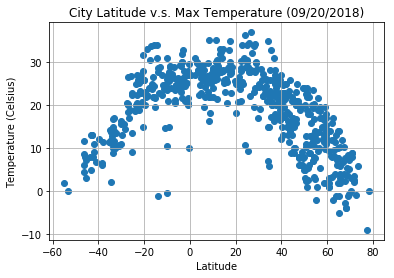

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude v.s. Max Temperature (09/20/2018)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("MaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

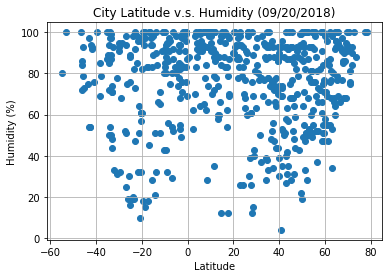

In [45]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude v.s. Humidity (09/20/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

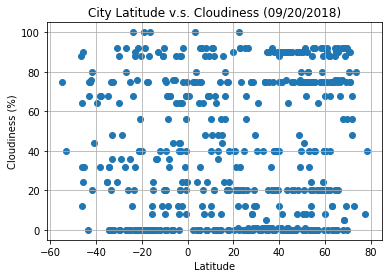

In [46]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude v.s. Cloudiness (09/20/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

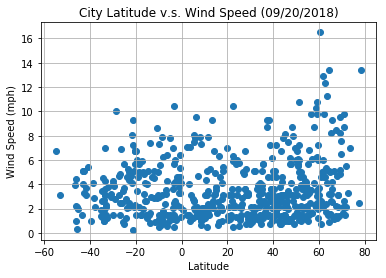

In [47]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude v.s. Wind Speed (09/20/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed.png")

# Show plot
plt.show()